In [0]:
!pip install tensorflow

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf




In [0]:
from google.colab import files
uploaded=files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [0]:
def read_datasets():
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  Banknote=pd.read_csv(io.StringIO(uploaded['BankNote_Authentication.csv'].decode('utf-8')))
    
  X=Banknote[Banknote.columns[0:4]].values
  y=Banknote[Banknote.columns[4]]
  encoder=LabelEncoder()
  encoder.fit(y)
  y=encoder.transform(y)
  Y=one_hot_encode(y)
  print(X.shape)
  return(X,Y)
  


In [0]:
#Define the encoder function
def one_hot_encode(labels):
  n_labels=len(labels)
  n_unique_labels=len(np.unique(labels))
  one_hot_encode=np.zeros((n_labels,n_unique_labels))
  one_hot_encode[np.arange(n_labels),labels]=1
  return one_hot_encode
  

In [0]:
#Read the dataset
X, Y = read_datasets()
#shuffle the dataset
X,Y = shuffle(X,Y,random_state=1)
#split the dataset into train and test sets
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=101)

User uploaded file "BankNote_Authentication.csv" with length 46442 bytes
(1372, 4)


In [0]:
#Inspecting the training and testing sets of the data
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(960, 4)
(960, 2)
(412, 4)
(412, 2)


In [0]:
#Defind the import parameters to work with tensors
train_epochs = 100 #the number of iterations that most be done to minimize the loss
learning_rate =0.3
cost_history=np.empty(shape=[1],dtype=float) #loss_function
n_dim = X.shape[1] #shape of feautures store in X and includes the number of columns
print("n_dim", n_dim)
n_class = 2 #here we got just two labels (mine and rock)
model_path= " "#path you wish to save your model

n_dim 4


In [0]:
#Define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 10
n_hidden_2 = 10
n_hidden_3 = 10
n_hidden_4 = 10

In [0]:
x= tf.placeholder(tf.float32,[None,n_dim])
W= tf.Variable(tf.zeros([n_dim,n_class]))
b= tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class]) #provides us with the actual outpu of the model

In [0]:
#This function is our model
def multilayer_perceptron(x,weights,biases):
  layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
  layer_1=tf.nn.sigmoid(layer_1)

  layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
  layer_2=tf.nn.sigmoid(layer_2)

  layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
  layer_3=tf.nn.sigmoid(layer_3)

  layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
  layer_4=tf.nn.relu(layer_4)


  out_layer=tf.matmul(layer_4,weights['out'])+ biases['out']
  return out_layer

In [0]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

In [0]:
biases ={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

In [0]:

init = tf.global_variables_initializer()
saver = tf.train.Saver()
y=multilayer_perceptron(x,weights,biases)

In [0]:
#Define the cost functin and optimizer
#Cost functin
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y,labels=y_))
#optimizer
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [0]:
sess = tf.Session()
sess.run(init)

In [0]:
#calculate the cost and accuracy for each epoch
mse_history=[]
accuracy_history =[]

In [0]:
for epoch in range(train_epochs):
  sess.run(training_step,feed_dict={x:train_x,y_:train_y})
  cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
  cost_history=np.append(cost_history,cost)
  correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
  
  pred_y=sess.run(y,feed_dict={x:test_x})
  mse_=tf.reduce_mean(tf.square(pred_y-test_y))
  mse_history.append(mse_)
  accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
  accuracy_history.append(accuracy)

  print("epoch: ",epoch,"-","costs: ",cost,"-MSE: ",mse_,"-Train Accuracy: ",accuracy)

epoch:  0 - costs:  2.8025415 -MSE:  Tensor("Mean_2:0", shape=(), dtype=float64) -Train Accuracy:  0.565625
epoch:  1 - costs:  4.667934 -MSE:  Tensor("Mean_4:0", shape=(), dtype=float64) -Train Accuracy:  0.434375
epoch:  2 - costs:  2.7321775 -MSE:  Tensor("Mean_6:0", shape=(), dtype=float64) -Train Accuracy:  0.565625
epoch:  3 - costs:  0.84382826 -MSE:  Tensor("Mean_8:0", shape=(), dtype=float64) -Train Accuracy:  0.434375
epoch:  4 - costs:  1.1191908 -MSE:  Tensor("Mean_10:0", shape=(), dtype=float64) -Train Accuracy:  0.565625
epoch:  5 - costs:  0.96620107 -MSE:  Tensor("Mean_12:0", shape=(), dtype=float64) -Train Accuracy:  0.434375
epoch:  6 - costs:  1.0010647 -MSE:  Tensor("Mean_14:0", shape=(), dtype=float64) -Train Accuracy:  0.565625
epoch:  7 - costs:  0.7084686 -MSE:  Tensor("Mean_16:0", shape=(), dtype=float64) -Train Accuracy:  0.434375
epoch:  8 - costs:  0.6790784 -MSE:  Tensor("Mean_18:0", shape=(), dtype=float64) -Train Accuracy:  0.565625
epoch:  9 - costs:  0.

In [0]:
save_path=saver.save(sess,model_path)
print(f"models saved in file {save_path}")

models saved in file  


In [0]:
#print the final accuracy
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("test accuracy",(sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

test accuracy 0.99271846


Text(0, 0.5, 'Accuracy')

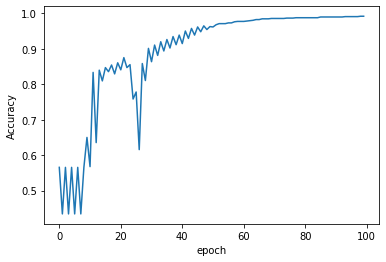

In [0]:
#plot th mse and accuracy graph
plt.plot(accuracy_history)
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [0]:
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE: %4.f"%sess.run(mse))

MSE:    6
